# 🩺 Dashboard Interativo - Dados de Pacientes

Este notebook apresenta um dashboard interativo com visualizações dos dados do arquivo `dados_pacientes.csv`.

Inclui:
- Distribuições de idade, altura e peso
- Contagens por tipo sanguíneo e estado civil
- Mapa de calor de correlação entre variáveis numéricas

Execute as células abaixo para visualizar os gráficos.

In [1]:
# 📦 Instalação de bibliotecas necessárias
!pip install plotly pandas

In [2]:
# 📚 Importação de bibliotecas
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 📁 Carregamento dos dados
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('dados_pacientes.csv')
df.columns = df.columns.str.strip()
df.head()

Saving dados_pacientes.csv to dados_pacientes.csv


,id_paciente,idade(anos),altura(cm),peso(kg),tipo_sanguineo,estado_civil
0,1,69,206,119,O+,Solteiro
1,2,32,184,48,AB-,Solteiro
2,3,89,192,48,AB-,Solteiro
3,4,78,205,41,A-,Casado
4,5,38,192,145,A-,Casado


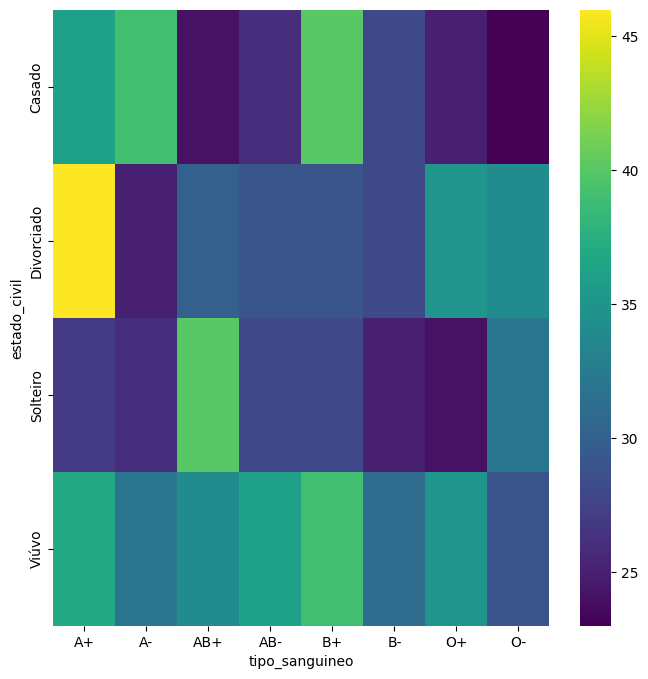

In [4]:
# @title tipo_sanguineo vs estado_civil

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['estado_civil'].value_counts()
    for x_label, grp in df.groupby('tipo_sanguineo')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_sanguineo')
_ = plt.ylabel('estado_civil')

In [5]:
# 📊 Distribuição de Idade
fig = px.histogram(df, x='idade(anos)', nbins=30, title='Distribuição de Idade')
fig.show()

In [6]:
# 📏 Distribuição de Altura
fig = px.histogram(df, x='altura(cm)', nbins=30, title='Distribuição de Altura')
fig.show()

In [7]:
# ⚖️ Distribuição de Peso
fig = px.histogram(df, x='peso(kg)', nbins=30, title='Distribuição de Peso')
fig.show()

In [8]:
import plotly.express as px

# Contagem por Tipo Sanguíneo
df_plot = df['tipo_sanguineo'].value_counts().reset_index()
df_plot.columns = ['Tipo Sanguíneo', 'Contagem']

fig = px.bar(df_plot,
             x='Tipo Sanguíneo', y='Contagem',
             title='Contagem por Tipo Sanguíneo')
fig.show()


In [9]:
import pandas as pd
import plotly.express as px

# Carregar os dados
df = pd.read_csv("dados_pacientes.csv")

# Contagem por Estado Civil
df_plot = df['estado_civil'].value_counts().reset_index()
df_plot.columns = ['Estado Civil', 'Contagem']

# Gerar o gráfico
fig = px.bar(df_plot,
             x='Estado Civil', y='Contagem',
             title='Contagem por Estado Civil')
fig.show()


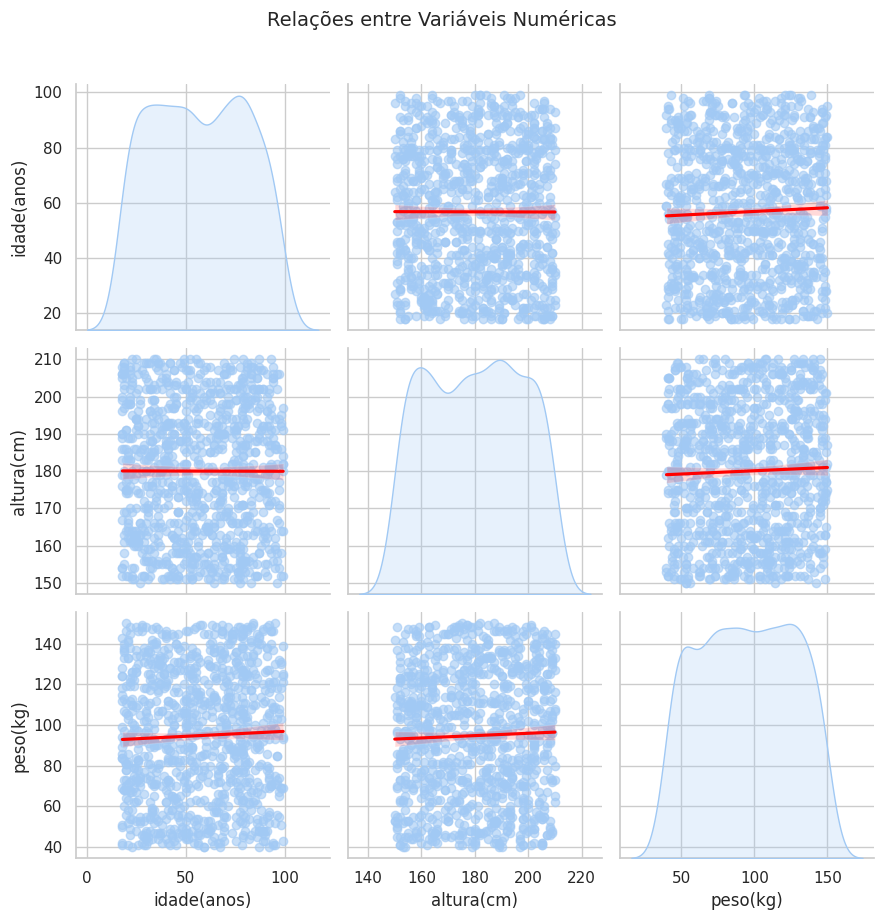

In [10]:
#Relação entre variaveis
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo e paleta
sns.set(style="whitegrid", palette="pastel")

# Lista de colunas numéricas
numeric_cols = ['idade(anos)', 'altura(cm)', 'peso(kg)']

# Gráfico de pares com linhas de regressão e distribuição KDE
pairplot = sns.pairplot(df[numeric_cols], kind='reg', diag_kind='kde',
                        plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}},
                        height=3)

# Título geral
pairplot.fig.suptitle("Relações entre Variáveis Numéricas", fontsize=14, y=1.02)

# Ajuste de layout
plt.tight_layout()
plt.show()
